In [2]:
import pandas as pd


In [7]:
df = pd.read_csv('large_countries_2015.csv', sep = ",")
df

,country,population,fertility,continent
0,Bangladesh,1.609956e+08,2.12,Asia
1,Brazil,2.078475e+08,1.78,South America
2,China,1.376049e+09,1.57,Asia
3,India,1.311051e+09,2.43,Asia
4,Indonesia,2.575638e+08,2.28,Asia
5,Japan,1.265735e+08,1.45,Asia
6,Mexico,1.270172e+08,2.13,North America
7,Nigeria,1.822020e+08,5.89,Africa
8,Pakistan,1.889249e+08,3.04,Asia
9,Philippines,1.006994e+08,2.98,Asia


In [ ]:
Aggregation method
take some rows, apply some kind of "operation" and return a resumed version of these rows

In [9]:
df.sum()

country       BangladeshBrazilChinaIndiaIndonesiaJapanMexico...
population                                         4504153940.0
fertility                                                 29.25
continent     AsiaSouth AmericaAsiaAsiaAsiaAsiaNorth America...
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     12 non-null     object 
 1   population  12 non-null     float64
 2   fertility   12 non-null     float64
 3   continent   12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


In [12]:
df.agg(['min', 'mean'])

,country,population,fertility,continent
min,Bangladesh,1.006994e+08,1.4500,Africa
mean,NaN,3.753462e+08,2.4375,NaN


In [13]:
df.min()

country        Bangladesh
population    100699395.0
fertility            1.45
continent          Africa
dtype: object

In [21]:
dfx

100699395.0

In [25]:
df[
    df["population"]== df["population"].min()
]

,country,population,fertility,continent
9,Philippines,100699395.0,2.98,Asia


In [26]:
df.describe()

,population,fertility
count,1.200000e+01,12.000000
mean,3.753462e+08,2.437500
std,4.565194e+08,1.200781
min,1.006994e+08,1.450000
25%,1.393470e+08,1.737500
50%,1.855634e+08,2.125000
75%,2.736163e+08,2.567500
max,1.376049e+09,5.890000


In [27]:
df.agg(
    ['median', 'mean'])

,population,fertility
median,1.855634e+08,2.1250
mean,3.753462e+08,2.4375


In [29]:
df.agg(
    {
    "population": "median",
    "fertility": "mean"}
)

population    1.855634e+08
fertility     2.437500e+00
dtype: float64

In [32]:
def double(x):
    return 2*x

In [ ]:
Enter .groupby()

In [43]:
for continents, sub_groups in g:
        print(continents)
        print(sub_groups)
        print('\n')

Africa
   country   population  fertility continent
7  Nigeria  182201962.0       5.89    Africa


Asia
       country    population  fertility continent
0   Bangladesh  1.609956e+08       2.12      Asia
2        China  1.376049e+09       1.57      Asia
3        India  1.311051e+09       2.43      Asia
4    Indonesia  2.575638e+08       2.28      Asia
5        Japan  1.265735e+08       1.45      Asia
8     Pakistan  1.889249e+08       3.04      Asia
9  Philippines  1.006994e+08       2.98      Asia


Europe
   country   population  fertility continent
10  Russia  143456918.0       1.61    Europe


North America
          country   population  fertility      continent
6          Mexico  127017224.0       2.13  North America
11  United States  321773631.0       1.97  North America


South America
  country   population  fertility      continent
1  Brazil  207847528.0       1.78  South America




In [44]:
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

In [46]:
g.get_group('Asia')

,country,population,fertility,continent
0,Bangladesh,1.609956e+08,2.12,Asia
2,China,1.376049e+09,1.57,Asia
3,India,1.311051e+09,2.43,Asia
4,Indonesia,2.575638e+08,2.28,Asia
5,Japan,1.265735e+08,1.45,Asia
8,Pakistan,1.889249e+08,3.04,Asia
9,Philippines,1.006994e+08,2.98,Asia


In [47]:
df.shape

(12, 4)

In [59]:
df.groupby('continent')['population'].agg(['median'], ['mean'])

,median
continent,
Africa,182201962.0
Asia,188924874.0
Europe,143456918.0
North America,224395427.5
South America,207847528.0


what does groupby actually do?
1. it **splits** the data
2. it **applies** 
3. it **combines** the data back into a new (pandas) object(i.e. series or dataframe)

In [74]:
g2 = df.groupby('continent')['fertility'].min()
g2

continent
Africa           5.89
Asia             1.45
Europe           1.61
North America    1.97
South America    1.78
Name: fertility, dtype: float64

In [61]:
type(g2)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='continent,population'>

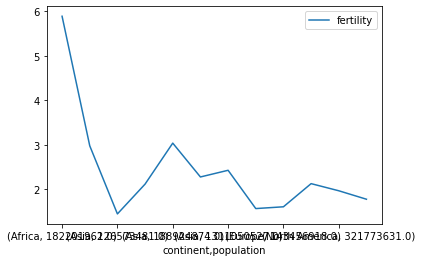

In [93]:
g1 = df.groupby(['continent', 'population']).median().plot()
g1

In [86]:
g1.iloc[1]

population    1.609956e+08
fertility     2.120000e+00
Name: (Asia, Bangladesh), dtype: float64

In [98]:
df.groupby('continent').apply(double)


,country,population,fertility,continent
0,BangladeshBangladesh,3.219913e+08,4.24,AsiaAsia
1,BrazilBrazil,4.156951e+08,3.56,South AmericaSouth America
2,ChinaChina,2.752098e+09,3.14,AsiaAsia
3,IndiaIndia,2.622101e+09,4.86,AsiaAsia
4,IndonesiaIndonesia,5.151276e+08,4.56,AsiaAsia
5,JapanJapan,2.531470e+08,2.90,AsiaAsia
6,MexicoMexico,2.540344e+08,4.26,North AmericaNorth America
7,NigeriaNigeria,3.644039e+08,11.78,AfricaAfrica
8,PakistanPakistan,3.778497e+08,6.08,AsiaAsia
9,PhilippinesPhilippines,2.013988e+08,5.96,AsiaAsia
